## K-Means:

The [normalized automobile distributor timing speed and ignition coil gaps](https://course.ccs.neu.edu/cs6220/homework-4/data/) for production F-150 trucks over the years of 1996, 1999, 2006, 2015, and 2022. We have stripped out the labels for the five years of data. 

Each sample in the dataset is two-dimensional, i.e. $\textbf{x}_i \in \mathbb{R}^2$ (one dimension for timing speed and the other for coil gaps), and there are $N=5000$ instances in the data.



In [ ]:
!curl -o data.txt https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  249k  100  249k    0     0   627k      0 --:--:-- --:--:-- --:--:--  627k


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
df = pd.read_csv("data.txt", header=None)

In [ ]:
df

,0,1
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


#### Question 1a:
Implement a simple k-means algorithm in Python on Colab with the
following initialization:

\begin{equation}
\textbf{x}_1 = \left( \begin{matrix} 10 \\ 10 \end{matrix} \right), \textbf{x}_2 = \left( \begin{matrix} -10 \\ -10 \end{matrix} \right),
\textbf{x}_3 = \left( \begin{matrix} 2 \\ 2 \end{matrix} \right),
\textbf{x}_4 = \left( \begin{matrix} 3 \\ 3 \end{matrix} \right),
\textbf{x}_5 = \left( \begin{matrix} -3 \\ -3 \end{matrix} \right),
\nonumber
\end{equation} 

You need only 100 iterations, maximum, and your algorithm should run very quickly to get the results.

In [ ]:
x1, x2, x3, x4, x5 = (10, 10), (-10, -10), (2, 2), (3, 3), (-3, -3)

In [ ]:
centroids = np.asarray([x1, x2, x3, x4, x5])
centroids

array([[ 10,  10],
       [-10, -10],
       [  2,   2],
       [  3,   3],
       [ -3,  -3]])

In [ ]:
def show_plot(centroids=None, df=[]):
  cdict = {0: 'blue', 1: 'red', 2: 'green', 3:'yellow', 4:'pink'}
  fig, ax = plt.subplots()
  for g in np.unique(df.label):
      ix = np.where(df.label == g)
      ax.scatter(df.iloc[ix][0], df.iloc[ix][1], c = cdict[g], label = g)

  if (centroids is not None):
    ax.scatter(centroids.T[0], centroids.T[1], marker='x', c="black")
  ax.legend()
  plt.show()

In [ ]:
def distance_euclidean(centroids, pos):
  return ((centroids - np.array(pos))**2).sum(axis=1)

In [ ]:
# this can also be done with kd tree
def find_closest_centroid(centroids, pos):
  # array = np.asarray(centroids)
  idx = distance_euclidean(centroids, pos).argmin()
  return idx # centroids[idx]

In [ ]:
def cal_diff(centroids_prev, centroids_curr):
  return np.sqrt(((centroids_prev - centroids_curr)**2).sum(axis=1))

Algorithm of K-means:
```
pick cluster centers of # number     // the existing point at the begining 
for some # of iterations             // centroids become archetype(not the point in data) after 1 iteration
		for each feature vector fi
				find cloeset cluster center 
			  assign li to be the closest cluster center     // label data
		re-initialize cluster centers (saving old ones)
		for each featuer vector fi
				add fi to centroid li
		for each centroid                                  // recompute centroid
				the value of centroid divide by # of feature vectors 
		compare new centroids to old centroids
				break if close enough
```

In [ ]:
def find_k_means(centroids):
  iteration = 100
  threshold = 1e-20

  for iter in range(1, iteration+1):
    df["label"] = df.apply(lambda row: find_closest_centroid(centroids, (row[0], row[1])), axis=1) # find cloest cluster centroid
    centroids_curr = np.asarray(df.groupby(by=["label"]).mean()) # ssd
    diff = cal_diff(centroids, centroids_curr)
    print("diff: ",diff)
    if diff.mean() < threshold:
      break
    else: 
      centroids = centroids_curr
      # show_plot(centroids, df)
  return centroids_curr

In [ ]:
centroids = find_k_means(centroids)

diff:  [16.8159311  16.12447497  3.79569782  7.98168173  2.69335685]
diff:  [2.16120038 2.84292894 0.90809656 1.58398347 1.72766816]
diff:  [1.19643619 1.66051701 0.50573609 0.82955472 1.627202  ]
diff:  [0.75312875 1.15140865 0.36875125 0.51280962 1.16070068]
diff:  [0.38613913 0.90126517 0.37817607 0.23826207 0.9333542 ]
diff:  [0.20393155 0.75808628 0.3277428  0.0851373  0.75304475]
diff:  [0.14216467 0.50395629 0.28973181 0.01036627 0.52087421]
diff:  [0.10518831 0.41125825 0.28659    0.02247389 0.47693463]
diff:  [0.03998674 0.44656984 0.25225569 0.05006833 0.45026239]
diff:  [0.         0.38963138 0.20389668 0.04949904 0.3845051 ]
diff:  [0.03998674 0.20596137 0.25639665 0.11343118 0.32461803]
diff:  [0.10518831 0.16334586 0.20996095 0.14710343 0.25048895]
diff:  [0.13008066 0.09094251 0.21401937 0.15021503 0.23640551]
diff:  [0.06408322 0.03485114 0.18978739 0.14201172 0.14872343]
diff:  [0.11435204 0.0438574  0.17570979 0.20984529 0.09116293]
diff:  [0.13820547 0.03164178 0.140

In [ ]:
centroids

array([[ 27.26677403,  -1.08848482],
       [-32.27032272,   2.65984149],
       [ -1.45401192,  -2.23932918],
       [ 11.48737759,  -1.70898344],
       [-15.05895772,  -0.47281415]])

#### Question 1b:
Scatter the results in two dimensions with different clusters as different colors. You can use ```matplotlib pyplot``` functionality:

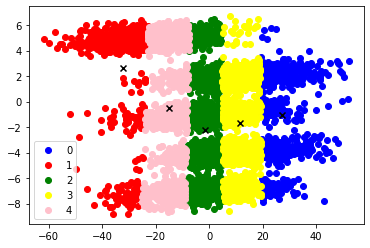

In [ ]:
show_plot(centroids, df)

## Question 2

In the data from Question 1, let `x` and `y` be two instances, i.e., they are each truck with separate measurements.  A common distance metric is the __Mahalanobis Distance__ with a specialized matrix $P \in \mathbb{R}^{2 \times 2}$ that is written as follows: 

\begin{equation}
d(\textbf{x}, \textbf{y}) = ( \textbf{x} - \textbf{y} )^T (P^T P)^{-1} ( \textbf{x} - \textbf{y} )
\nonumber
\end{equation} \\

In scalar format (non-matrix format), the Mahalanobis Distance can be expressed as:

\begin{equation}
    d(\textbf{x}, \textbf{y}) = \sum_{i=1}^2 \sum_{j=1}^2 (x_i - y_i) \cdot (P^T P)^{-1}_{i,j} \cdot (x_j - y_j)
    \nonumber
\end{equation}

where `x` and `y` are two instances of dimensionality 2, and $d(\textbf{x}, \textbf{y})$ is the distance between them. In the case of the F150 engine components, $P$ is a known relationship through Ford's quality control analysis each year, where it is numerically shown as below: \\

\begin{equation}
 P = \left(
\begin{matrix}
10 & 0.5 \\
-10 & 0.25
\end{matrix}
\right) \nonumber
\end{equation}

> It is a multi-dimensional generalization of the idea of measuring how many standard deviations away P is from the mean of D. This distance is zero for P at the mean of D and grows as P moves away from the mean along each principal component axis. If each of these axes is re-scaled to have unit variance, then the Mahalanobis distance corresponds to standard Euclidean distance in the transformed space. The Mahalanobis distance is thus unitless, scale-invariant, and takes into account the correlations of the data set.



#### Question 2a
Using the same data as __Question 1__ and the same initialization instances $\{\textbf{x}_1, \textbf{x}_2, \textbf{x}_3, \textbf{x}_4, \textbf{x}_5 \}$ implement a specialized $k$-means with the above Mahalanobis Distance. Scatter the results with the different clusters as different colors.

In [89]:
centroids = np.asarray([x1, x2, x3, x4, x5])
P = np.asarray([[10, 0.5], [-10, 0.25]])

In [ ]:
def mahalanobis_distance(R, x, y):
  diff = x - y
  return diff.T @ R @ diff

In [ ]:
def find_closest_centroid(distance_metric, R, centroids, pos):
  d = []
  for c in centroids:
    d.append(distance_metric(R, c, pos))
  # print("metric",d)
  idx = np.argmin(d)
  return idx # centroids[idx] 

In [ ]:
def find_closest_centroid_1(R, centroids, pos):
  d = (((pos - centroids).dot(R))**2).sum(axis=1)
  # print("metric",d)
  idx = np.argmin(d)
  return idx # centroids[idx] 

In [ ]:
def cal_diff_mahalanobis(R, centroids_prev, centroids_curr):
  d = []
  for c_prev, c_curr in zip(centroids_prev, centroids_curr):
    d.append(mahalanobis_distance(R, c_prev, c_curr))

  return np.asarray(d)
  # return (((centroids_prev - centroids_curr).dot(R))**2).sum(axis=1)

In [ ]:
def find_k_means_mahalanobis(centroids, P):
  iteration = 100
  threshold = 1e-20
  R = np.linalg.inv(P.T @ P)
  
  for iter in range(1, iteration+1):
    df["label"] = df.apply(lambda row: find_closest_centroid(mahalanobis_distance, R = R, centroids= centroids, pos = (row[0], row[1])), axis=1) # find cloest cluster centroid
    centroids_curr = np.asarray(df.groupby(by=["label"]).mean()) # find new centroids
    diff = cal_diff_mahalanobis(R, centroids, centroids_curr)
    print("diff", iter, ":", diff)
    # print("centroids", centroids_curr)
    if diff.mean() < threshold:
      break
    else: 
      centroids = centroids_curr
      # show_plot(centroids_curr, df)
      
  # show_plot(centroids_curr, df)
  return centroids_curr

In [ ]:
centroids = find_k_means_mahalanobis(centroids, P)

diff 1 : [45.02610566 27.08525072  1.25803843 16.28639569  0.23622362]
diff 2 : [0.93101277 0.12459988 0.13649352 0.08374665 0.01160004]
diff 3 : [0.0756519  0.005926   0.02794979 0.02250231 0.01165908]
diff 4 : [0.02120189 0.0002058  0.02166524 0.01112452 0.02369656]
diff 5 : [0.01301526 0.00060551 0.01418787 0.00898041 0.02053425]
diff 6 : [0.00614086 0.00078016 0.01349896 0.00660936 0.02192953]
diff 7 : [0.00141307 0.00076096 0.01686273 0.00372089 0.02796709]
diff 8 : [0.00175342 0.00010649 0.01900909 0.00208052 0.03525504]
diff 9 : [0.00061331 0.00019948 0.01779322 0.00208434 0.03558323]
diff 10 : [8.91179599e-04 4.12006233e-05 1.85526860e-02 2.84079161e-03
 4.09217119e-02]
diff 11 : [0.00134739 0.00026431 0.01866504 0.01274756 0.04030147]
diff 12 : [0.00213718 0.         0.01347165 0.02601839 0.02227525]
diff 13 : [5.04118149e-03 9.12745370e-06 5.65368424e-03 3.34513107e-02
 9.29406703e-03]
diff 14 : [0.0041775  0.         0.00527853 0.06584843 0.00392917]
diff 15 : [7.96828863e-0

In [ ]:
centroids

array([[-20.40310599,   5.00655283],
       [ -3.24764066,  -7.01766444],
       [ -1.09670369,  -0.9992032 ],
       [  9.97451285,   2.00207148],
       [  8.71408722,  -4.00981947]])

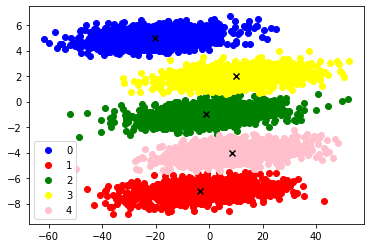

In [ ]:
show_plot(centroids, df)

#### Question 2b
Calculate and print out the principle components of the aggregate
data.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
data = df[[0, 1]]
data

,0,1
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


To find principle components of aggregate data:
1. Calculate the covariance matrix: Compute the covariance matrix of the standardized data. This will give you a matrix where each element represents the covariance between two variables.

In [ ]:
Cov1 = np.cov(data.T)
print(Cov1)
print(Cov1.shape)

[[321.52128167 -17.31559029]
 [-17.31559029  18.37430687]]
(2, 2)


2. Compute the eigenvectors and eigenvalues: Find the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the amount of variation explained by each eigenvector.

In [ ]:
eigval, eigvec = np.linalg.eig(Cov1)
print(eigval)
print(eigvec)

[322.50713273  17.38845582]
[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


In [ ]:
xpoint = data.dot(eigvec.T[0])
ypoint = data.dot(eigvec.T[1])

This is how the data projected through PCA

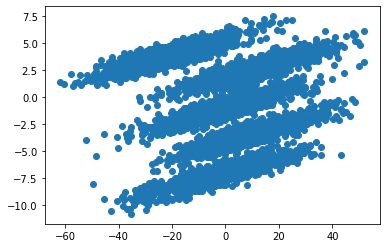

In [ ]:
plt.scatter(xpoint, ypoint)

#### Question 2c
Calculate and print out the principle components of each cluster. 
Are they the same as the aggregate data? Are they the same as each other?

In [ ]:
data0 = df[df['label']==0][[0,1]]
data0.shape

(1000, 2)

In [ ]:
data1 = df[df['label']==1][[0,1]]
data1.shape

(1000, 2)

In [ ]:
data2 = df[df['label']==2][[0,1]]
data2.shape

(1004, 2)

In [ ]:
data3 = df[df['label']==3][[0,1]]
data3.shape

(998, 2)

In [ ]:
data4 = df[df['label']==4][[0,1]]
data4.shape

(998, 2)

In [ ]:
data_l = [data0, data1, data2, data3, data4]

In [ ]:
cov = []
eigval, eigvec = [], []

In [ ]:
for data in data_l:
  m = np.cov(data.T)
  cov.append(m)
  val, vec = np.linalg.eig(m)
  eigval.append(val)
  eigvec.append(vec)

In [ ]:
for i in range(0, 5):
  print("eigval",eigval[i] ,"eigvec", eigvec[i])

eigval [195.0259165   0.2722047] eigvec [[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]
eigval [204.376807     0.28339306] eigvec [[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]
eigval [217.34942629   0.27670722] eigvec [[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
eigval [204.42164874   0.26977027] eigvec [[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]
eigval [191.5356272    0.26355151] eigvec [[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]


In [ ]:
xpoint, ypoint = [], []
for i in range(0, 5):
  xpoint.append(data_l[i].dot(eigvec[i].T[0]))
  ypoint.append(data_l[i].dot(eigvec[i].T[1]))

This is how the date projected after PCA

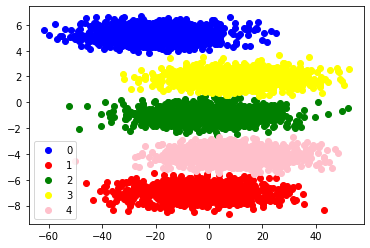

In [ ]:
fig1, ax = plt.subplots()
cdict = {0: 'blue', 1: 'red', 2: 'green', 3:'yellow', 4:'pink'}

for i in range(0, 5):
  ax.scatter(xpoint[i], ypoint[i], c = cdict[i], label=i)

ax.legend()
plt.show()

They are surpringly similiar to each other.

#### Question 2d
Take the eigenvector / eigenvalue decomposition of $P^T$ and subsequently, take their product. That is to say, 

\begin{equation}
    \{\Lambda, \Phi\} = \verb"eig"\left( P^T \right)
    \nonumber
\end{equation}

where $\Lambda = \left( \begin{matrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{matrix} \right)$ and $\Phi$ is a $2 \times 2$ matrix with $\phi_i \in \mathbb{R}^2$, a column in $\Phi$. Calculate a new $P'$ such that

\begin{equation}
    P' = \Lambda \Phi \nonumber
\end{equation}

What is the relationship between $P'$ and the data? 


In [100]:
P = np.asarray([[10, 0.5], [-10, 0.25]])

In [101]:
l,e = np.linalg.eig(P.T)
P1 = l*e
l = np.array([[l[0],0],[0,l[1]]])
P2 = l*e

In [102]:
print(P1)
print(P2)

[[9.44301625 0.58344264]
 [0.51282107 0.53717161]]
[[9.44301625 0.        ]
 [0.         0.53717161]]


In [105]:
val, vec = np.linalg.eig( P.T @ P )
print(vec)

[[ 0.99992166 -0.01251662]
 [ 0.01251662  0.99992166]]
